 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [243]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [185]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [186]:
# Count nulls
whale_df.isnull().mean() * 100
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [188]:
# Drop nulls
whale_df = whale_df.dropna()

# Validate no more missing values
whale_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [189]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [191]:
# Count nulls
algo_df.isnull().mean() * 100
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [194]:
# Drop nulls
algo_df = algo_df.dropna()

# Validate no more missing values
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [195]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("sp500_history.csv")
snp_df = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
snp_df.sort_values("Date", ascending=True, inplace = True)
snp_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [196]:
# Check Data Types
snp_df.dtypes

Close    object
dtype: object

In [197]:
# Fix Data Types

snp_df['Close'] = snp_df['Close'].str.replace('$', '')
snp_df['Close'] = snp_df['Close'].astype('float')
snp_df['Close'].dtypes
snp_df['Close']


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [199]:
# Calculate Daily Returns
snp_returns = snp_df.pct_change()
snp_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [200]:
# Drop nulls
snp_returns = snp_returns.dropna()

# Validate no more missing values
snp_returns.isnull().sum()

Close    0
dtype: int64

In [201]:
# Rename Column
snp_returns = snp_returns.rename(columns={
    "Date": "Date",
    "Close": "S&P500 Return"
})

snp_returns.head()

,S&P500 Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [217]:
# Concatenate all DataFrames into a single DataFrame
concat_data = pd.concat([whale_df,algo_df,snp_returns], axis="columns", join="outer")
concat_data = concat_data.dropna()
concat_data


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

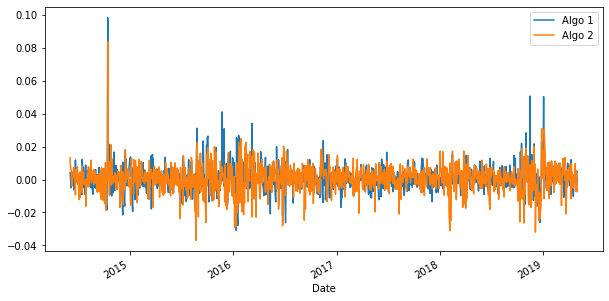

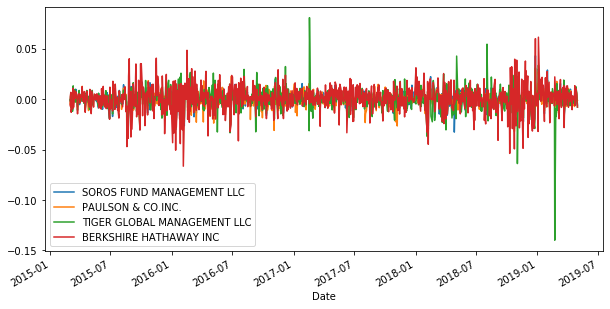

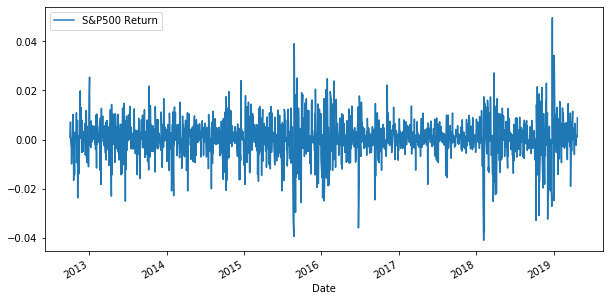

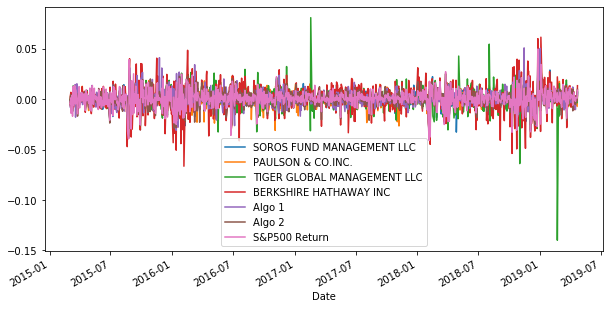

In [218]:
# Plot daily returns
algo_df.plot(figsize=(10,5))
whale_df.plot(figsize=(10,5))
snp_returns.plot(figsize=(10,5))
concat_data.plot(figsize=(10,5))

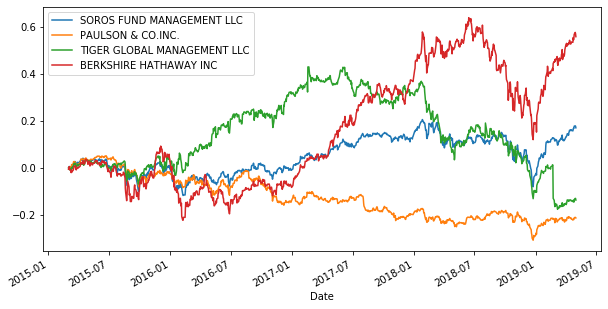

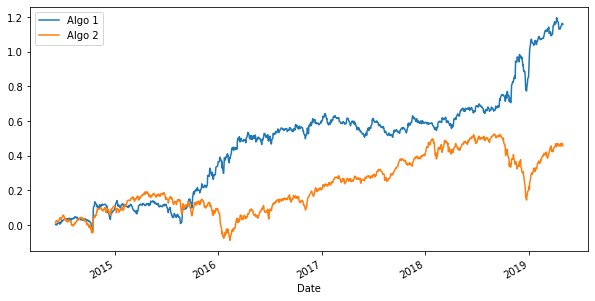

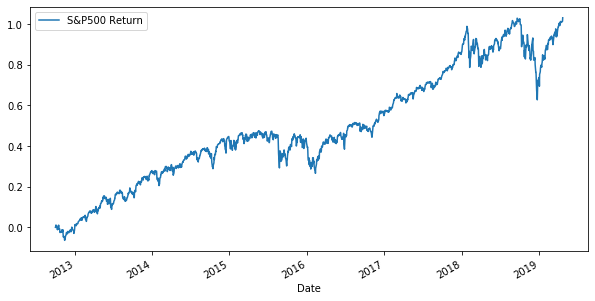

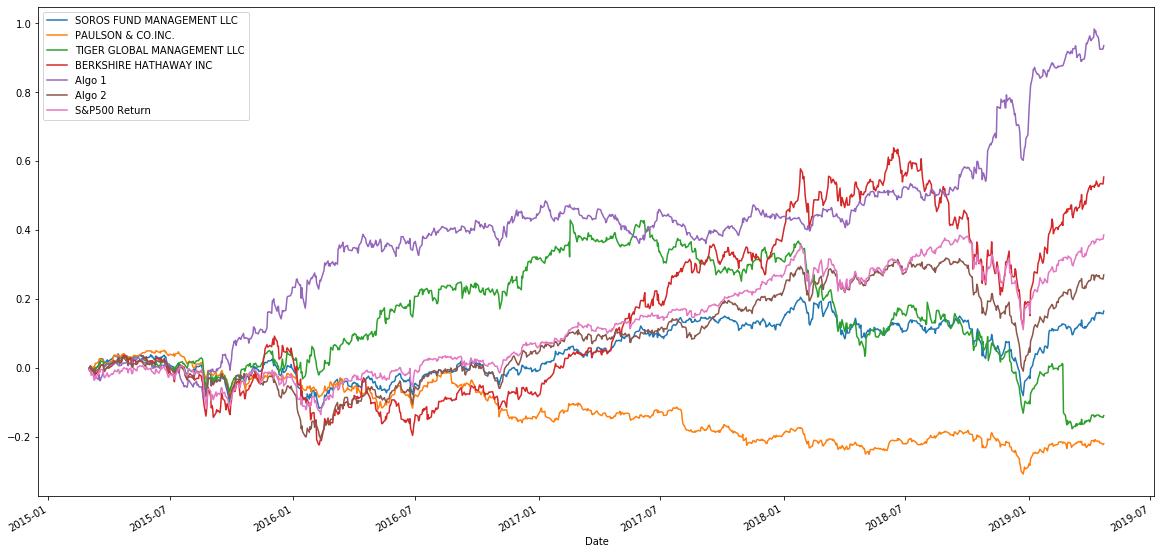

In [219]:
# Plot cumulative returns

cum_whale_returns = (1 + whale_df).cumprod()-1
cum_algo_returns = (1 + algo_df).cumprod()-1
cum_snp_returns = (1 + snp_returns).cumprod()-1
cum_concat_returns = (1 + concat_data).cumprod()-1
cum_whale_returns.plot(figsize=(10,5))
cum_algo_returns.plot(figsize=(10,5))
cum_snp_returns.plot(figsize=(10,5))
cum_concat_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

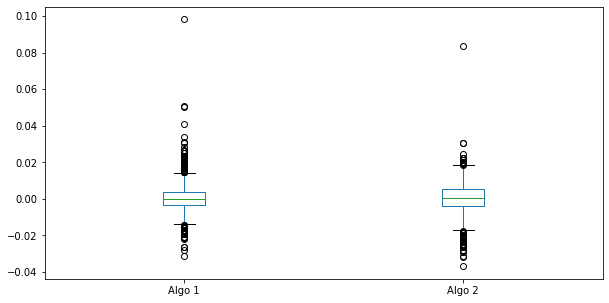

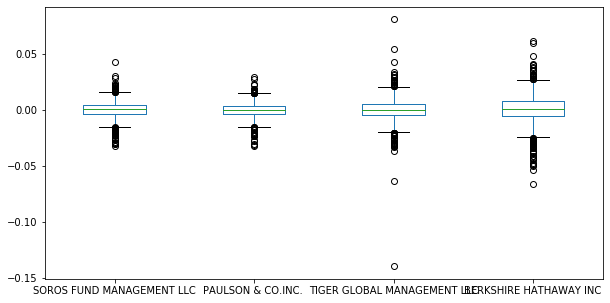

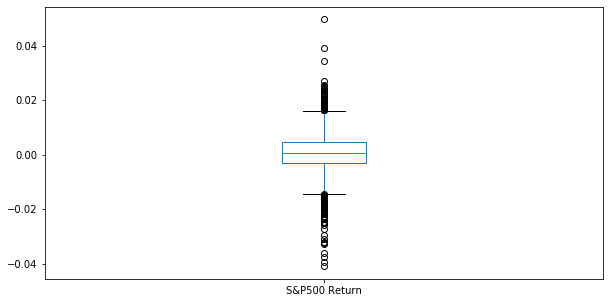

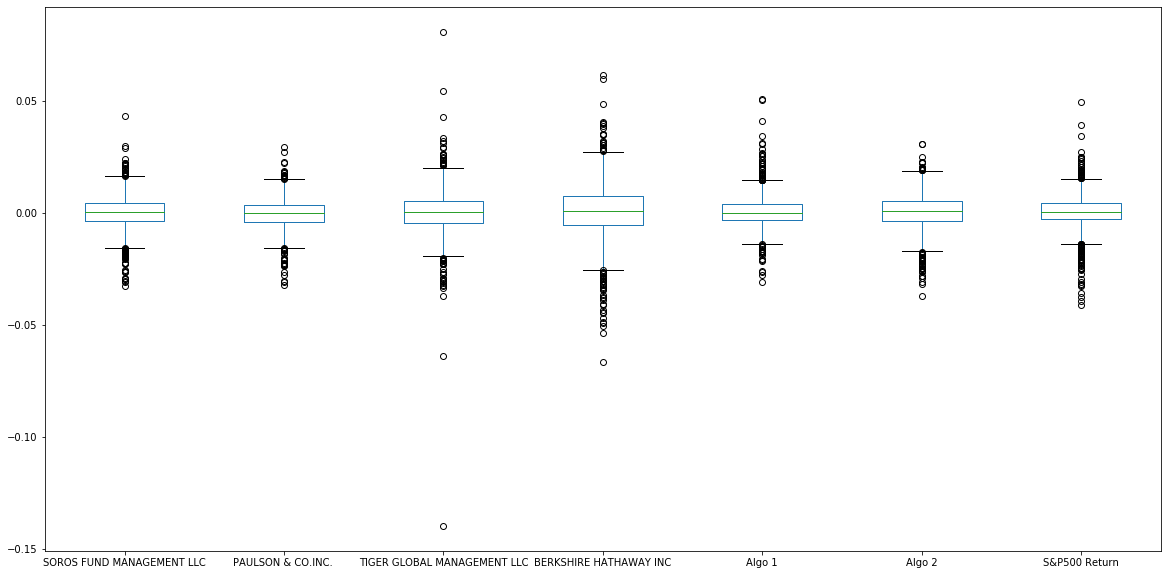

In [220]:
# Box plot to visually show risk
algo_df.plot.box(figsize=(10,5))
whale_df.plot.box(figsize=(10,5))
snp_returns.plot.box(figsize=(10,5))
concat_data.plot.box(figsize=(20,10))

In [233]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

#std_whale = whale_df.std()
#std_algo = algo_df.std()
#std_snp = snp_return.std()
std_concat = concat_data.std()
std_concat.sort_values(inplace=True)
std_concat

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500 Return                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [238]:
# Determine which portfolios are riskier than the S&P 500
print("TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC")

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC


In [230]:
# Calculate the annualized standard deviation (252 trading days)
std_whale_ann = whale_df.std()* np.sqrt(252)
std_algo_ann = algo_df.std()* np.sqrt(252)
std_snp_ann = snp_return.std()* np.sqrt(252)
print(std_whale_ann)
print(std_algo_ann)
print(std_snp_ann)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64
Algo 1    0.126801
Algo 2    0.134401
dtype: float64
Close    0.129133
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

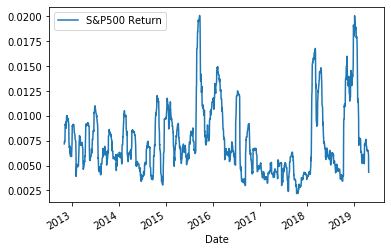

In [239]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
snp_returns.rolling(window=21).std().plot()

In [245]:
# Correlation
correlation = concat_data.corr()
correlation
#sns.heatmap(correlation, vmin=-1, vmax=1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500 Return,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [249]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = concat_data['Algo 1'].cov(concat_data['S&P500 Return'])
variance = concat_data['Algo 1'].var()
algo_1_beta = covariance / variance
algo_1_beta

0.313734135114606

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

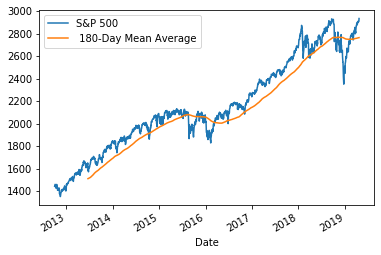

In [258]:
# Set figure of the daily closing prices of MSFT
spx = snp_df.plot()

# Plot 180-Day Rolling Mean on the same figure
snp_df.rolling(window=180).mean().plot(ax=spx)

# Set the legend of the figure
spx.legend(["S&P 500", " 180-Day Mean Average"]);

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [259]:
# Annualzied Sharpe Ratios
sharpe_ratios = (concat_data.mean() * 252) / (concat_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500 Return                  0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

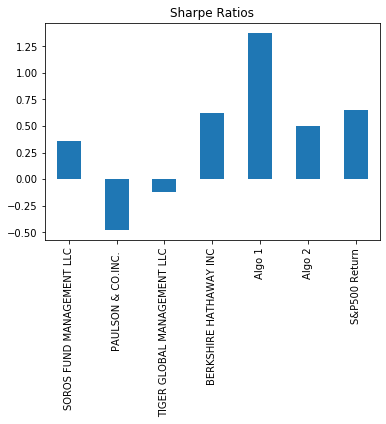

In [260]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [321]:
# Read the first stock
amzn_csv = Path("AMZN.csv")
amzn_df = pd.read_csv(amzn_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
amzn_df = amzn_df.rename(columns={
    "Date": "Date",
    "Close": "AMZN"
})
amzn_df.head()

,AMZN
Date,
2018-04-23,1517.86
2018-04-24,1460.09
2018-04-25,1460.17
2018-04-26,1517.96
2018-04-27,1572.62


In [322]:
# Read the second stock
tsla_csv = Path("TSLA.csv")
tsla_df = pd.read_csv(tsla_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.rename(columns={
    "Date": "Date",
    "Close": "TSLA"
})
tsla_df.head()

,TSLA
Date,
2018-04-23,283.37
2018-04-24,283.46
2018-04-25,280.69
2018-04-26,285.48
2018-04-27,294.08


In [323]:
# Read the third stock
jpm_csv = Path("JPM.csv")
jpm_df = pd.read_csv(jpm_csv, index_col="Date",infer_datetime_format=True, parse_dates=True)
jpm_df = jpm_df.rename(columns={
    "Date": "Date",
    "Close": "JPM"
})
jpm_df.head()

,JPM
Date,
2018-04-23,110.93
2018-04-24,110.41
2018-04-25,109.99
2018-04-26,110.10
2018-04-27,109.40


In [324]:
# Concatenate all stocks into a single DataFrame
concat_port = pd.concat([amzn_df,tsla_df,jpm_df], axis="columns", join="outer")
concat_port

,AMZN,TSLA,JPM
Date,,,
2018-04-23,1517.86,283.37,110.93
2018-04-24,1460.09,283.46,110.41
2018-04-25,1460.17,280.69,109.99
2018-04-26,1517.96,285.48,110.10
2018-04-27,1572.62,294.08,109.40
...,...,...,...
2019-04-15,1844.87,266.38,109.94
2019-04-16,1863.04,273.36,111.10
2019-04-17,1864.82,271.23,114.30


In [325]:
# Reset the index
concat_port.sort_index(inplace=True)

In [326]:
# Drop Nulls
concat_port = concat_port.dropna()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

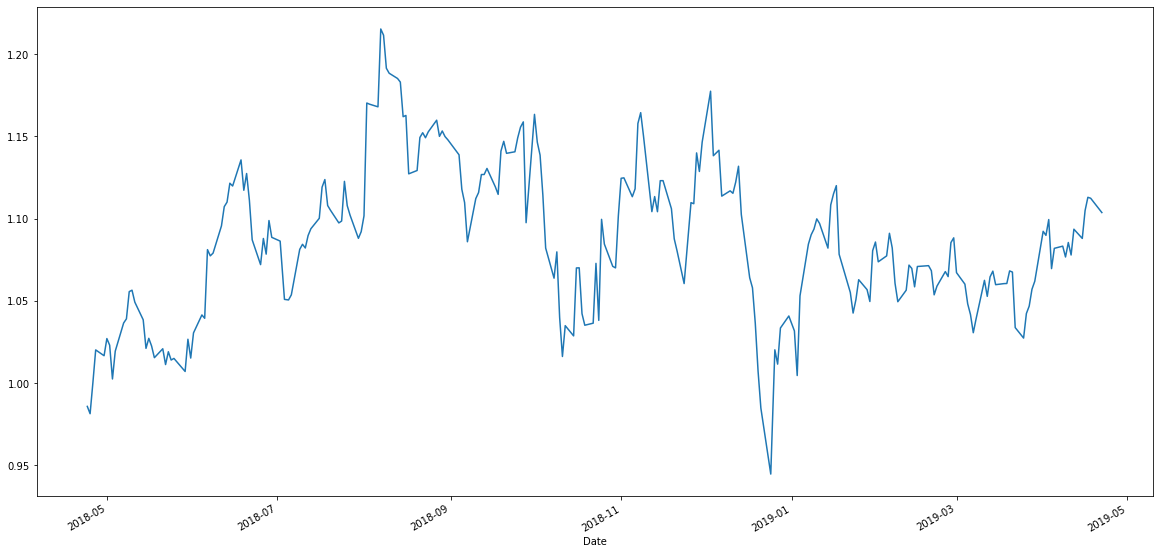

In [327]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
concat_port_return = concat_port.pct_change()
concat_port_return
my_portfolio_return = concat_port_return.dot(weights)
my_cumulative_return = (1 + my_portfolio_return).cumprod()
my_cumulative_return.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [328]:
giant_port = pd.concat([concat_data,concat_port_return], axis="columns", join="outer")
giant_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return,AMZN,TSLA,JPM
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.009849,0.026203,0.010551
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000955,-0.007792,0.028803
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.001678,0.007484,-0.007349


In [335]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
giant_port = giant_port.dropna()
giant_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return,AMZN,TSLA,JPM
Date,,,,,,,,,,
2018-04-24,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381,-0.038060,0.000318,-0.004688
2018-04-25,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837,0.000055,-0.009772,-0.003804
2018-04-26,0.007127,0.004416,0.005724,0.018664,-0.003238,0.005543,0.010434,0.039578,0.017065,0.001000
2018-04-27,-0.032711,0.000142,0.001663,-0.005245,-0.002001,-0.000782,0.001114,0.036009,0.030125,-0.006358
2018-04-30,0.004538,-0.011806,-0.015002,-0.001435,-0.002609,-0.008726,-0.008188,-0.004127,-0.000612,-0.005667
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.000982,-0.004931,-0.011420
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.009849,0.026203,0.010551
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.000955,-0.007792,0.028803


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [336]:
# Risk
std_giant = giant_port.std()
std_giant.sort_values(inplace=True)
std_giant

PAULSON & CO.INC.              0.007369
Algo 1                         0.008283
Algo 2                         0.008606
S&P500 Return                  0.009351
SOROS FUND MANAGEMENT LLC      0.009352
JPM                            0.012786
TIGER GLOBAL MANAGEMENT LLC    0.014658
BERKSHIRE HATHAWAY INC         0.015261
AMZN                           0.022052
TSLA                           0.036517
dtype: float64

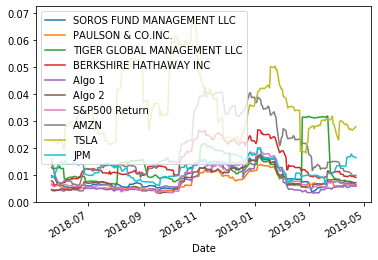

In [337]:
# Rolling
giant_port.rolling(window=21).std().plot()

In [346]:
# Beta
AMZN_covariance = giant_port['AMZN'].cov(concat_data['S&P500 Return'])
AMZN_variance = giant_port['AMZN'].var()
AMZN_beta = AMZN_covariance / AMZN_variance

TSLA_covariance = giant_port['TSLA'].cov(concat_data['S&P500 Return'])
TSLA_variance = giant_port['TSLA'].var()
TSLA_beta = TSLA_covariance / TSLA_variance


JPM_covariance = giant_port['JPM'].cov(concat_data['S&P500 Return'])
JPM_variance = giant_port['JPM'].var()
JPM_beta = JPM_covariance / JPM_variance

print(f"Amazon beta is {AMZN_beta}")
print(f"Tesla beta is {TSLA_beta}")
print(f"JP Morgan beta is {JPM_beta}")

Amazon beta is 0.34076386425888017
Tesla beta is 0.07869533522017476
JP Morgan beta is 0.48919793739455775


In [332]:
# Annualzied Sharpe Ratios
giant_sharpe_ratios = (giant_port.mean() * 252) / (giant_port.std() * np.sqrt(252))
giant_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361006
PAULSON & CO.INC.              0.209265
TIGER GLOBAL MANAGEMENT LLC   -0.792109
BERKSHIRE HATHAWAY INC         0.324138
Algo 1                         2.199882
Algo 2                         0.154906
S&P500 Return                  0.928354
AMZN                           0.943694
TSLA                           0.489124
JPM                            0.447217
dtype: float64

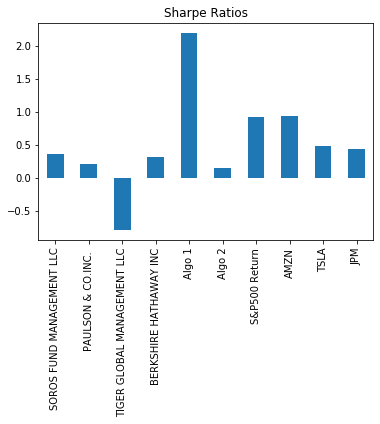

In [333]:
# Visualize the sharpe ratios as a bar plot
giant_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [320]:
giant_corr = giant_port.corr()
giant_corr
sns.heatmap(giant_corr, vmin=-1, vmax=1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Return,AMZN Close,TSLA Close,JPM Close
SOROS FUND MANAGEMENT LLC,1.000000,0.758210,0.460862,0.796388,0.321990,0.830100,0.847700,0.674026,0.258519,0.543127
PAULSON & CO.INC.,0.758210,1.000000,0.480308,0.635288,0.343893,0.772430,0.763009,0.592574,0.209846,0.470228
TIGER GLOBAL MANAGEMENT LLC,0.460862,0.480308,1.000000,0.320044,0.107476,0.404080,0.482776,0.313973,0.122636,0.347606
BERKSHIRE HATHAWAY INC,0.796388,0.635288,0.320044,1.000000,0.317709,0.781763,0.847399,0.797604,0.347741,0.481393
Algo 1,0.321990,0.343893,0.107476,0.317709,1.000000,0.356994,0.273123,0.307442,0.064428,0.199280
Algo 2,0.830100,0.772430,0.404080,0.781763,0.356994,1.000000,0.877564,0.734385,0.271189,0.561492
S&P500 Return,0.847700,0.763009,0.482776,0.847399,0.273123,0.877564,1.000000,0.803600,0.307315,0.668902
AMZN Close,0.674026,0.592574,0.313973,0.797604,0.307442,0.734385,0.803600,1.000000,0.265623,0.433824
TSLA Close,0.258519,0.209846,0.122636,0.347741,0.064428,0.271189,0.307315,0.265623,1.000000,0.172617
JPM Close,0.543127,0.470228,0.347606,0.481393,0.199280,0.561492,0.668902,0.433824,0.172617,1.000000
